In [28]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp

from tensorflow.keras.layers import  Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [4]:
cat_dir = 'data/train/cat'
dog_dir = 'data/train/dog'

In [20]:
class_names = ['Cat', 'Dog'] 

n_cats = len(os.listdir(cat_dir))
n_dogs = len(os.listdir(dog_dir))
n_images = [n_cats, n_dogs]
fig = px.pie(names=class_names, values=n_images, 
             title='Distribution of Images in Cat and Dog Classes',
             color_discrete_sequence=px.colors.qualitative.Set2)  
fig.show()

In [41]:
print(len(os.listdir('./tmp/cats-v-dogs/training/cats')))
print(len(os.listdir('./tmp/cats-v-dogs/training/dogs')))

print(len(os.listdir('./tmp/cats-v-dogs/validation/cats')))
print(len(os.listdir('./tmp/cats-v-dogs/validation/dogs')))

print(len(os.listdir('./tmp/cats-v-dogs/test/cats')))
print(len(os.listdir('./tmp/cats-v-dogs/test/dogs')))

12372
12375
1222
1218
1218
1220


In [42]:
# Rescaling pixel values to be between 0 and 1
INCLUDE_TEST =True
train_gen = ImageDataGenerator(
        rescale=1./255)


validation_gen =  ImageDataGenerator(
        rescale=1./255.)

if INCLUDE_TEST:
    test_gen =  ImageDataGenerator(
            rescale=1./255.)

In [43]:
train_generator = train_gen.flow_from_directory(
    './tmp/cats-v-dogs/training',
    target_size=(150, 150),        # Resize images to 150x150
    batch_size=64,                 # Number of images per batch
    class_mode='binary'            # Binary labels (cats: 0, dogs: 1)
)

validation_generator = validation_gen.flow_from_directory(
        './tmp/cats-v-dogs/validation',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

if INCLUDE_TEST:
    test_generator = test_gen.flow_from_directory(
        './tmp/cats-v-dogs/validation',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 24747 images belonging to 2 classes.
Found 2440 images belonging to 2 classes.
Found 2440 images belonging to 2 classes.


In [44]:
class_names = ['Cat', 'Dog']
def plot_data(generator, n_images):
    i = 1
    images, labels = generator.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

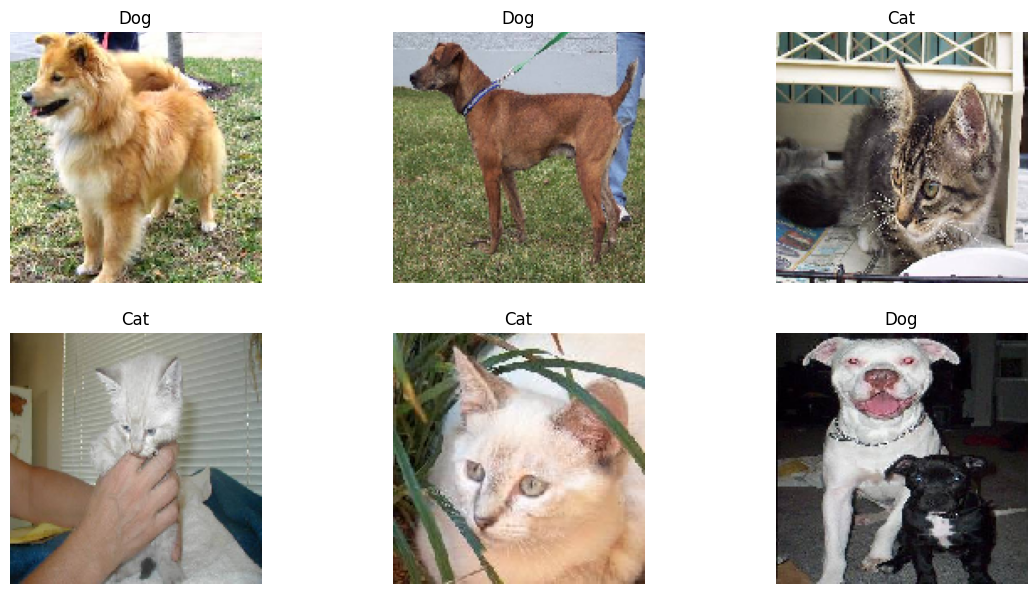

In [45]:
plot_data(train_generator,7)

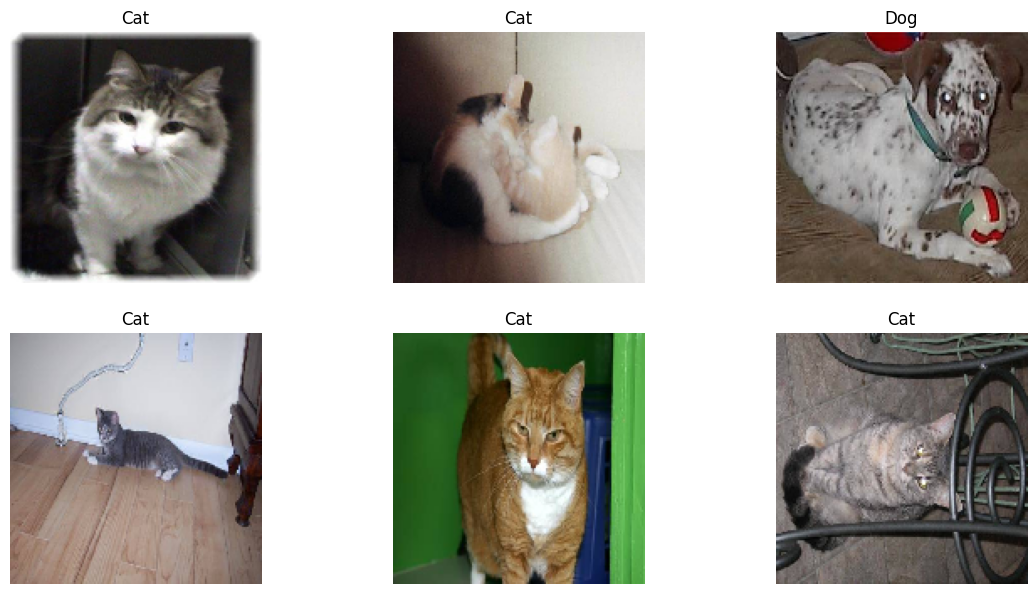

In [46]:
plot_data(validation_generator,7)

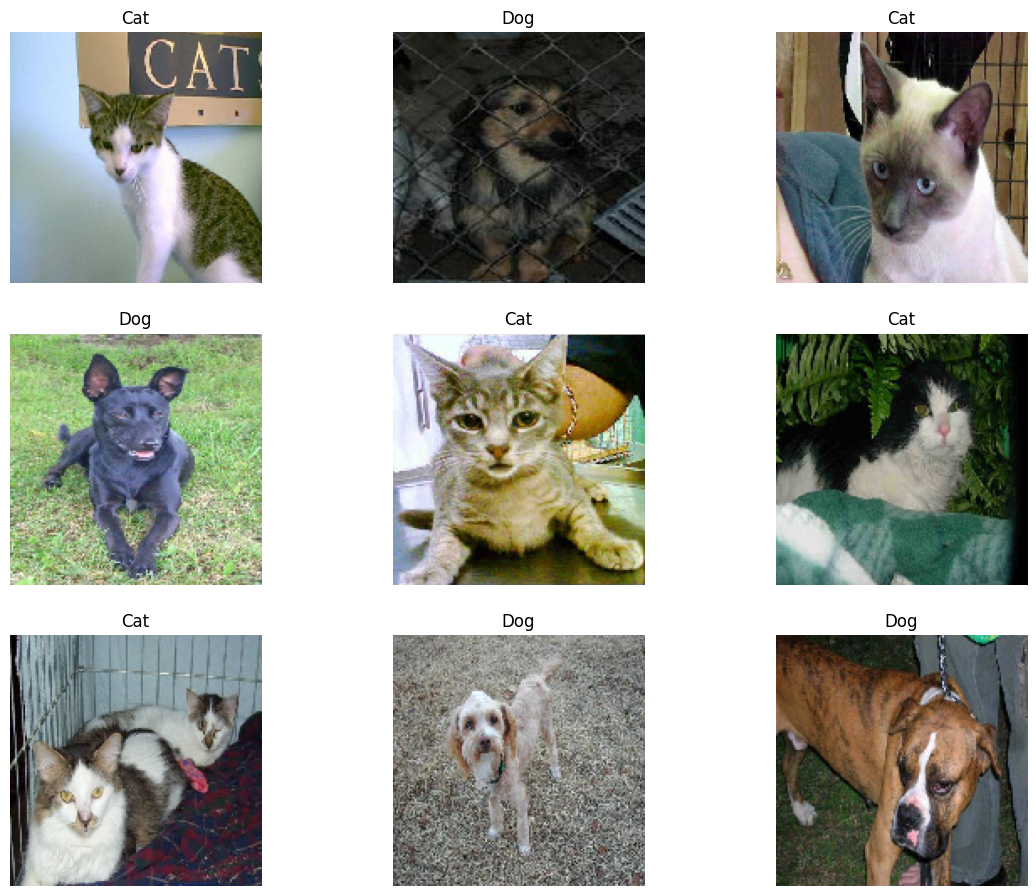

In [49]:
plot_data(test_generator, 10)

In [50]:
inputs = tf.keras.layers.Input(shape=(150,150,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x) 

model = Model(inputs=inputs, outputs=x)

In [51]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [52]:
r = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
387/387 [==============================] - 1877s 5s/step - loss: 0.6826 - accuracy: 0.5526 - val_loss: 0.6467 - val_accuracy: 0.6180
Epoch 2/10
387/387 [==============================] - 1740s 4s/step - loss: 0.6358 - accuracy: 0.6408 - val_loss: 0.5956 - val_accuracy: 0.6811
Epoch 3/10
387/387 [==============================] - 1747s 5s/step - loss: 0.5972 - accuracy: 0.6824 - val_loss: 0.5544 - val_accuracy: 0.7316
Epoch 4/10
387/387 [==============================] - 1994s 5s/step - loss: 0.5701 - accuracy: 0.7065 - val_loss: 0.5273 - val_accuracy: 0.7496
Epoch 5/10
387/387 [==============================] - 2296s 6s/step - loss: 0.5540 - accuracy: 0.7200 - val_loss: 0.6175 - val_accuracy: 0.6848
Epoch 6/10
387/387 [==============================] - 1663s 4s/step - loss: 0.5359 - accuracy: 0.7346 - val_loss: 0.5171 - val_accuracy: 0.7492
Epoch 7/10
387/387 [==============================] - 1805s 5s/step - loss: 0.5162 - accuracy: 0.7506 - val_loss: 0.4739 - val_accuracy:

In [54]:
model.evaluate(test_generator)

39/39 [==============================] - 56s 1s/step - loss: 0.3968 - accuracy: 0.8348


[0.396806925535202, 0.8348360657691956]

In [55]:
def plot_prediction(generator, n_images):
    i = 1
    images, labels = generator.next()
    preds = model.predict(images)
    predictions = np.argmax(preds, axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

2/2 [==============================] - 1s 484ms/step


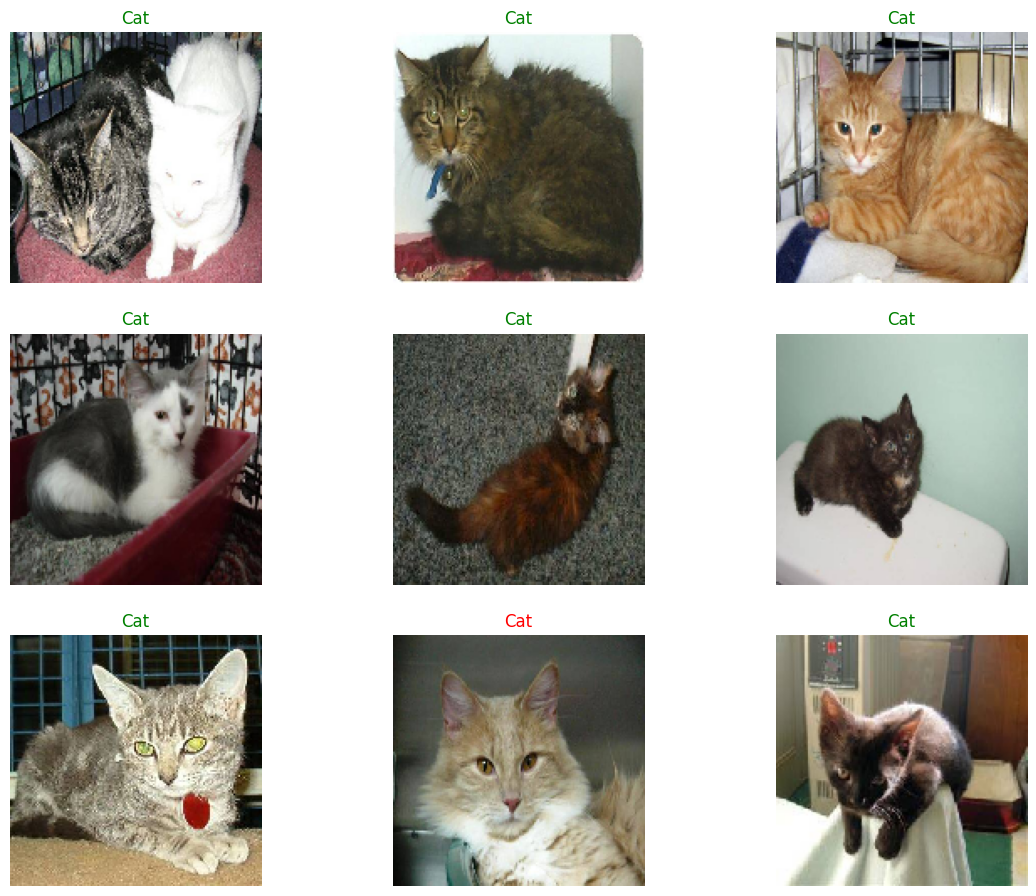

In [65]:
plot_prediction(test_generator, 10)

2/2 [==============================] - 1s 444ms/step


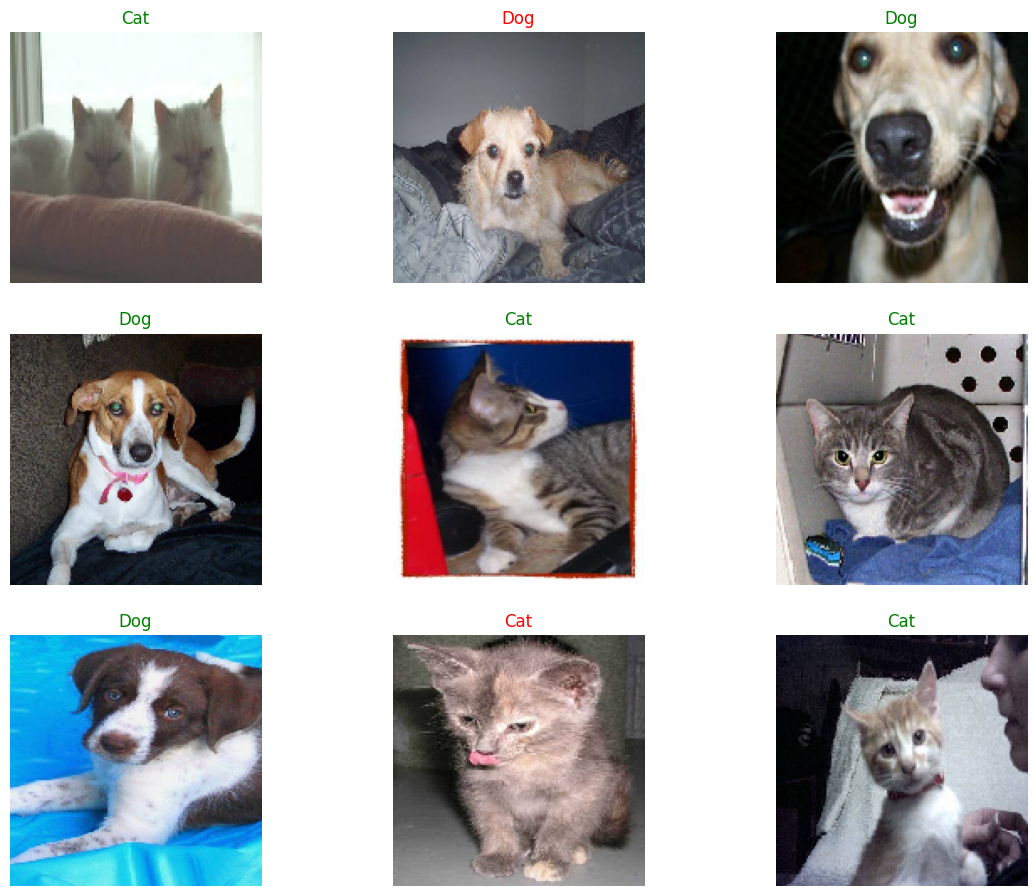

In [64]:
plot_prediction(validation_generator, 10)

In [60]:
def show_cam(image_index, features, results):

    features_for_img = features[image_index,:,:,:]

    prediction = np.argmax(results[image_index])

    class_activation_weights = gp_weights[:,prediction]

    class_activation_features = sp.ndimage.zoom(features_for_img, (150/30, 150/30, 1), order=2)

    cam_output  = np.dot(class_activation_features,class_activation_weights)

    print('Predicted Class = ' +str(class_names[prediction])+ ', Probability = ' + str(results[image_index][prediction]))

    
    plt.imshow(images[image_index])

    if results[image_index][prediction]>0.95:
        cmap_str = 'Greens'
    else:
        cmap_str = 'Blues'

    plt.imshow(cam_output, cmap=cmap_str, alpha=0.5)
    plt.axis('off')
    plt.show()

def show_maps(desired_class, num_maps):
    for i in range(0,num_maps):
        if np.argmax(results[i]) == desired_class:
            show_cam(i,features, results)

In [61]:
def show_maps(desired_class, num_maps):
    for i in range(0,num_maps):
        if np.argmax(results[i]) == desired_class:
            show_cam(i,features, results)

Predicted Class = Cat, Probability = 0.7724505


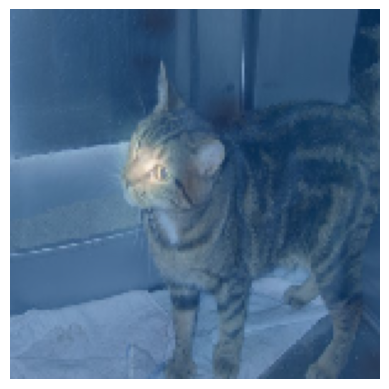

Predicted Class = Cat, Probability = 0.930843


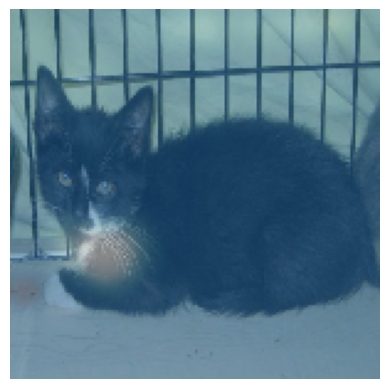

In [62]:
show_maps(0, 5)

Predicted Class = Dog, Probability = 0.9451039


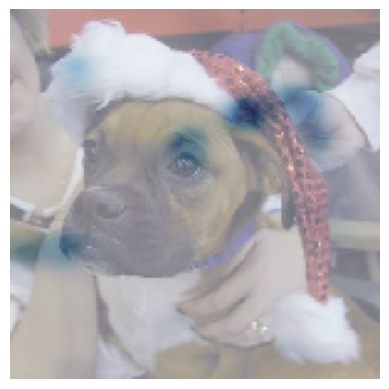

Predicted Class = Dog, Probability = 0.9423283


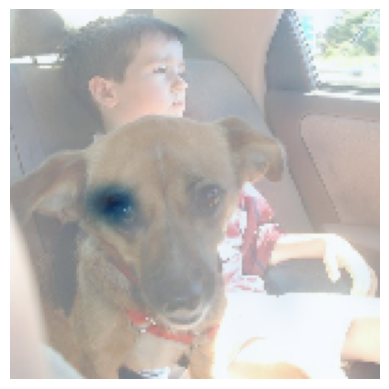

Predicted Class = Dog, Probability = 0.9934853


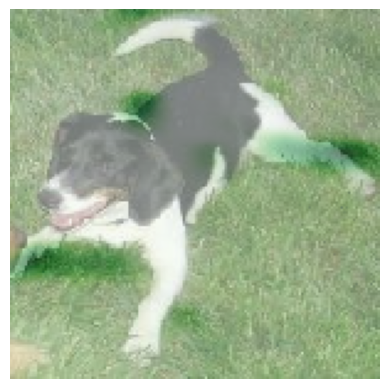

In [63]:
show_maps(1, 5)

# Visualize training process


In [66]:
results = pd.DataFrame(r.history)
results.tail()

loss  accuracy  val_loss  val_accuracy
5  0.535925  0.734635  0.517119      0.749180
6  0.516212  0.750636  0.473947      0.770902
7  0.496928  0.761708  0.579846      0.697541
8  0.469603  0.782762  0.421495      0.812705
9  0.445713  0.795733  0.396807      0.834836

In [75]:
fig = px.line(results, y=['accuracy', 'val_accuracy'], 
              labels={'value': 'Accuracy', 'variable': 'Type', 'index': 'Epochs'},
              template="seaborn", color_discrete_sequence=['#fad25a', 'red'])

fig.update_layout(
    title="Training and Validation Accuracy Over Epochs",
    title_font_color="#4ac",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    legend_title="Type",
    xaxis=dict(showgrid=True), 
    yaxis=dict(showgrid=True),  
)

fig.show()


In [73]:

fig = px.line(results, y=['loss', 'val_loss'], 
              labels={'value': 'Loss', 'variable': 'Type', 'index': 'Epochs'},
              template="seaborn", color_discrete_sequence=['#fad25a', 'red'])

fig.update_layout(
    title="Training and Validation Loss Over Epochs",
    title_font_color="#4ac",
    xaxis_title="Epochs",
    yaxis_title="Loss",
    legend_title="Type",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

fig.show()
